In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split

In [3]:
# Using iso-8859-1 encoding
data= pd.read_csv("C:/Users/anike/OneDrive/Desktop/Email/emaildatset.csv", encoding='iso-8859-1')


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [9]:
data.sample(5)

,v1,v2
5382,ham,"I can make it up there, squeezed &lt;#&gt; b..."
4058,spam,Moby Pub Quiz.Win a å£100 High Street prize if...
1109,ham,S s..first time..dhoni rocks...
2279,ham,"Sorry, I'll call later in meeting"
4042,ham,I am literally in bed and have been up for lik...


In [10]:
data.rename(columns={"v1":"Type","v2":"Text"},inplace=True)

In [11]:
data.sample(5)

,Type,Text
1788,ham,Arun can u transfr me d amt
642,ham,Probably gonna swing by in a wee bit
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"
2923,ham,Thts god's gift for birds as humans hav some n...
4018,spam,U've been selected to stay in 1 of 250 top Bri...


In [12]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [13]:
data["Type"]=en.fit_transform(data["Type"])

ham=0,
spam=1

In [15]:
data.sample(5)

,Type,Text
3285,0,Not to worry. I'm sure you'll get it.
5316,0,Jus finish watching tv... U?
1456,0,U sleeping now.. Or you going to take? Haha.. ...
3815,0,How long does it take to get it.
4360,0,"Don't Think About \What u Have Got\"" Think Abo..."


In [16]:
data.isnull().sum()

Type    0
Text    0
dtype: int64

In [17]:
data.duplicated().sum()

403

In [18]:
data=data.drop_duplicates(keep="first")

In [19]:
data.duplicated().sum()

0

In [20]:
data.shape

(5169, 2)

EDA


In [22]:
data.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data["Type"].value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22ba1a81b10>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

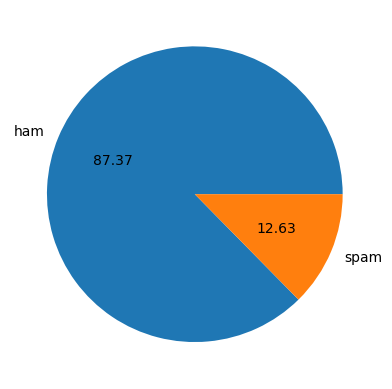

In [24]:
plt.pie(data["Type"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

data is imbalanced

In [26]:
import nltk

In [27]:
data["len_of_char"]=data['Text'].apply(len)

In [28]:
data.head()

,Type,Text,len_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
data["num_words"]=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
data.head()

,Type,Text,len_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
data["num_sentance"]=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
data.head()

,Type,Text,len_of_char,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
data[["len_of_char","num_words","num_sentance"]].describe()

,len_of_char,num_words,num_sentance
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
data[data['Type']==0][["len_of_char","num_words","num_sentance"]].describe()

,len_of_char,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


For ham massages

In [36]:
data[data['Type']==1][["len_of_char","num_words","num_sentance"]].describe()

,len_of_char,num_words,num_sentance
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


for spam massages

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='len_of_char', ylabel='Count'>

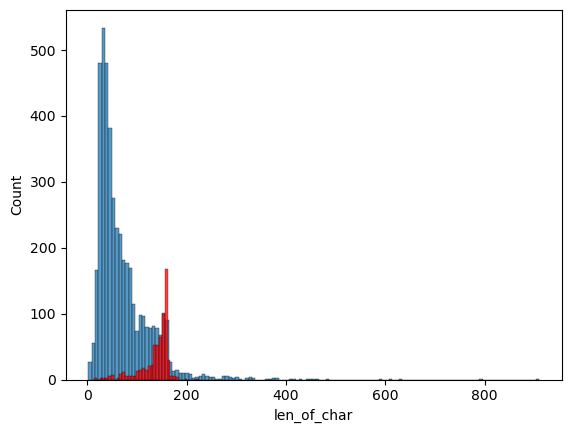

In [38]:
sns.histplot(data[data['Type']==0]["len_of_char"])
sns.histplot(data[data['Type']==1]["len_of_char"],color="red")

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

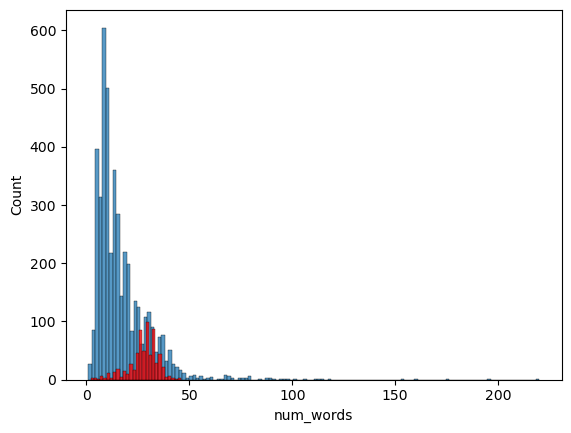

In [40]:
sns.histplot(data[data['Type']==0]["num_words"])
sns.histplot(data[data['Type']==1]["num_words"],color="red")

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


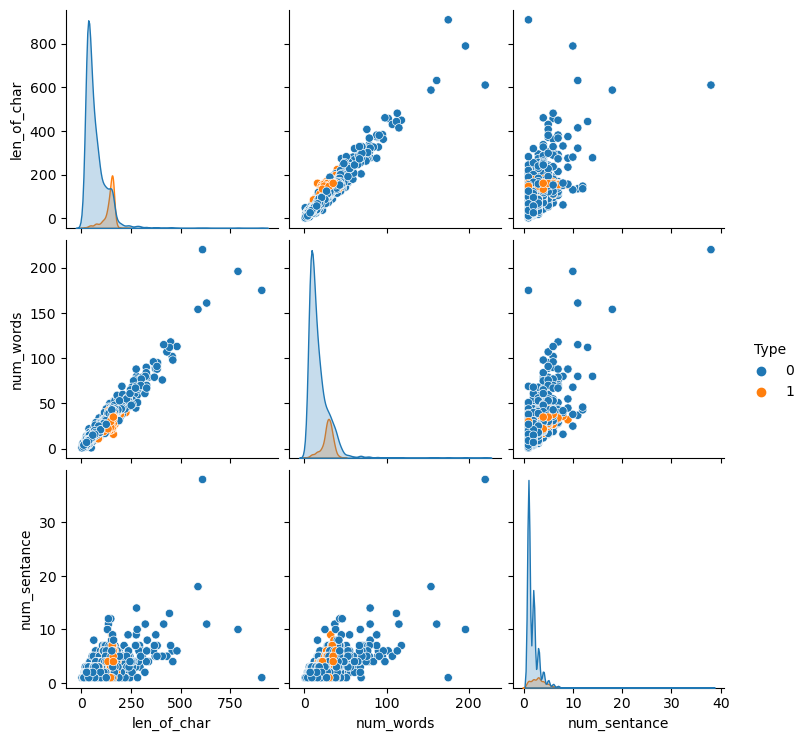

In [41]:
sns.pairplot(data,hue='Type')

Data Preprocessing

1.Lower case

2.Tokenization


3.Removing spqcial characters

4.Removing stop words and punctuation

In [47]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer



In [48]:
stopwords.words('english')
ps=PorterStemmer()

In [49]:
ps.stem("Danceing")

'danc'

In [50]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i  not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " " .join(y)
    

In [51]:
transform_text(" HII My NAme IS 20% aniKet and my skill is Danceing")

'hii name 20 aniket skill danc'

In [52]:
data["Text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [53]:
data["Transform_text"]=data["Text"].apply(transform_text)

In [54]:
#worcloud

In [55]:
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='white')

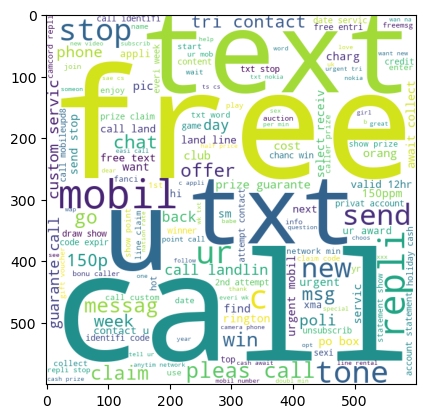

In [56]:
spam_wc=wc.generate(data[data['Type']==1]['Transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

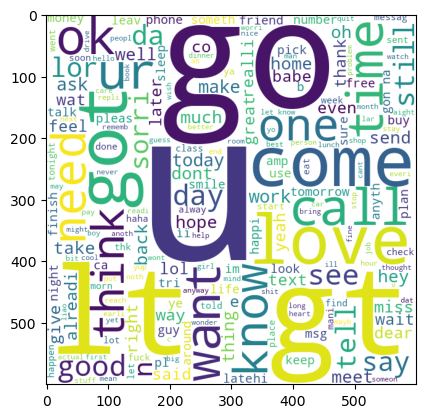

In [57]:
ham_wc=wc.generate(data[data['Type']==0]['Transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [58]:
spam_corpus=[]
for msg in data[data["Type"]==1]['Transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [59]:
ham_corpus=[]
for msg in data[data["Type"]==0]['Transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

Model Building


In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [62]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [63]:
X=tfidf.fit_transform(data["Transform_text"]).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y=data["Type"].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [72]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [73]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [150]:
import pickle

In [154]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))